keanu
denzel
benedict
[65 54 90 90]
[67 53 98 98]
On photo two same human!
[105  28  69  69]
[90  6 45 45]
On photo two same human!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


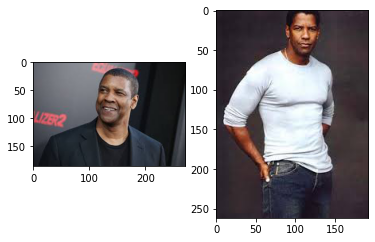

In [12]:
import numpy as np
import os
import cv2
from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model


cascade_path = 'path'
model_path = 'path'
image_dir_basepath = 'path'

names = ['keanu', 'denzel', 'benedict']
image_size = 160

model = load_model(model_path)


def prewhiten(x):
    if x.ndim == 4:
        axis = (1, 2, 3)
        size = x[0].size
    elif x.ndim == 3:
        axis = (0, 1, 2)
        size = x.size
    else:
        raise ValueError('Dimension should be 3 or 4')

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj
    return y


def l2_normalize(x, axis=-1, epsilon=1e-10):
    output = x / np.sqrt(np.maximum(np.sum(np.square(x),
                                           axis=axis,
                                           keepdims=True),
                                    epsilon))
    return output


def load_and_align_images(filepaths, margin):
    cascade = cv2.CascadeClassifier(cascade_path)
    aligned_images = []
    for filepath in filepaths:
        img = imread(filepath)

        faces = cascade.detectMultiScale(img,
                                         scaleFactor=1.1,
                                         minNeighbors=3)
        (x, y, w, h) = faces[0]
        print(faces[0])
        cropped = img[y-margin//2:y+h+margin//2,
                      x-margin//2:x+w+margin//2, :]
        aligned = resize(cropped, (image_size, image_size), mode='reflect')
        aligned_images.append(aligned)
    return np.array(aligned_images)


def calc_embs(filepaths, margin=10, batch_size=1):
    aligned_images = prewhiten(load_and_align_images(filepaths, margin))
    pd = []
    for start in range(0, len(aligned_images), batch_size):
        pd.append(model.predict_on_batch(
            aligned_images[start:start+batch_size]
        ))
    embs = l2_normalize(np.concatenate(pd))

    return embs


def calc_dist(img_name0, img_name1):
    return distance.euclidean(data[img_name0]['emb'], data[img_name1]['emb'])


def calc_dist_plot(img_name0, img_name1):
    if (calc_dist(img_name0, img_name1) < 0.8):
        print("On photo two same human!")
    else:
        print("On photo not two same human!")
    plt.subplot(1, 2, 1)
    plt.imshow(imread(data[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(data[img_name1]['image_filepath']))


data = {}
name = names[1]
image_dirpath = image_dir_basepath + '/' + name
image_filepaths = [os.path.join(image_dirpath, f) for f in
                   os.listdir(image_dirpath)]
embs = calc_embs(image_filepaths)
for i in range(len(image_filepaths)):
    data['{}{}'.format(name, i)] = {'image_filepath': image_filepaths[i],
                                    'emb': embs[i]}

calc_dist_plot('denzel0', 'denzel1')


[65 54 90 90]
[67 53 98 98]
On photo two same human!


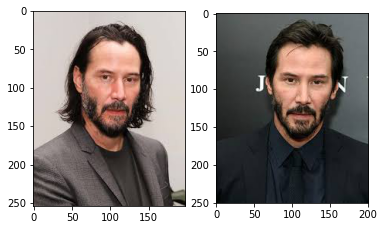

In [14]:
data = {}
name = names[0]
image_dirpath = image_dir_basepath + '/' + name
image_filepaths = [os.path.join(image_dirpath, f) for f in
                   os.listdir(image_dirpath)]
embs = calc_embs(image_filepaths)
for i in range(len(image_filepaths)):
    data['{}{}'.format(name, i)] = {'image_filepath': image_filepaths[i],
                                    'emb': embs[i]}

calc_dist_plot('keanu0', 'keanu1')

[65 54 90 90]
[67 53 98 98]
{'keanu0': {'image_filepath': '/content/drive/MyDrive/data_k/images/keanu/keanu_0000.jpg', 'emb': array([ 0.03388546,  0.02739031, -0.08989979, -0.10612298, -0.04399209,
        0.00874972,  0.02651274,  0.07945874, -0.01793063, -0.15508766,
        0.1480676 , -0.04465884,  0.07449374,  0.08376494, -0.07402973,
        0.13262399, -0.08310092, -0.06312504, -0.06160539, -0.02911363,
        0.11056108,  0.17593656, -0.16531156, -0.13007529,  0.06026657,
       -0.06182812, -0.00767491, -0.00363477,  0.02318595,  0.01369596,
       -0.01952458,  0.24919014,  0.13181786,  0.04280305, -0.01838741,
       -0.10742006,  0.03794361, -0.07652771, -0.10825144,  0.1193664 ,
        0.01766873,  0.07055256, -0.00862722, -0.04875271, -0.10148057,
       -0.21356156, -0.06509517,  0.07767414,  0.1964838 ,  0.02836855,
       -0.00361238,  0.04422471, -0.05746792, -0.03491002,  0.13423242,
       -0.04656419,  0.06191315, -0.01163986, -0.00095068, -0.0383492 ,
       -0.

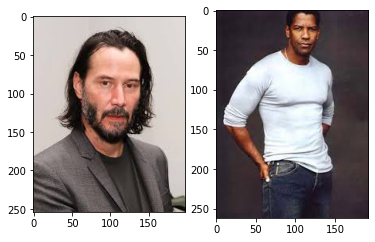

In [16]:
data = {}
ind = 0
for name in names:
    ind += 1
    image_dirpath = image_dir_basepath + '/' + name
    image_filepaths = [os.path.join(image_dirpath, f) for f in
                       os.listdir(image_dirpath)]
    embs = calc_embs(image_filepaths)
    for i in range(len(image_filepaths)):
        data['{}{}'.format(name, i)] = {'image_filepath': image_filepaths[i],
                                        'emb': embs[i]}
    print(data)
    if ind == 2:
        break

calc_dist_plot('keanu0', 'denzel1')

On photo not two same human!


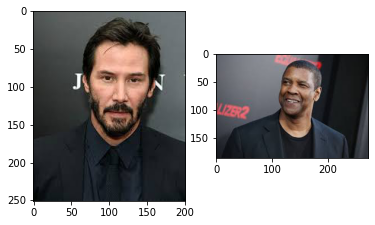

In [17]:
calc_dist_plot('keanu1', 'denzel0')